CW1 Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

In [4]:
train_path = "../data/CW1_train.csv"
df = pd.read_csv(train_path)

df.head()


,outcome,carat,cut,color,clarity,depth,table,price,x,y,z,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,4.18,0.709585,0.385796,0.267058,0.500222,0.462145,0.806922,0.891912,0.276683,0.967510,0.131087,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,2.83,0.649532,0.037578,0.618528,0.052079,0.008600,0.496153,0.092878,0.089039,0.321334,0.549223,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,3.10,0.550496,0.029469,0.350697,0.131802,0.317685,0.821415,0.581294,0.876056,0.743479,0.916367,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,3.50,0.982447,0.487176,0.339991,0.232601,0.267207,0.800913,0.984788,0.070506,0.528945,0.005256,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,3.77,0.030877,0.818540,0.955872,0.923147,0.861377,0.997349,0.091662,0.781069,0.019354,0.522191,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (10000, 31)
Columns: ['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


In [6]:
y = df["outcome"]
X = df.drop(columns=["outcome"])

print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (10000,)
X shape: (10000, 30)


In [7]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

Categorical: ['cut', 'color', 'clarity']
Numerical: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


### Feature types

The dataset contains a mixture of numerical and categorical features.  
The categorical variables are `cut`, `color`, and `clarity`, each of which represents discrete quality categories. These variables cannot be used directly by most regression models and will therefore require appropriate encoding.

All remaining features are numerical and represent continuous measurements. Several numerical features differ substantially in scale, which may necessitate feature scaling for models that are sensitive to input magnitude.

In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

In [9]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [10]:
y.describe()

count    10000.000000
mean        -4.979081
std         12.722224
min        -44.879471
25%        -13.989962
50%         -5.442794
75%          3.918593
max         39.675966
Name: outcome, dtype: float64

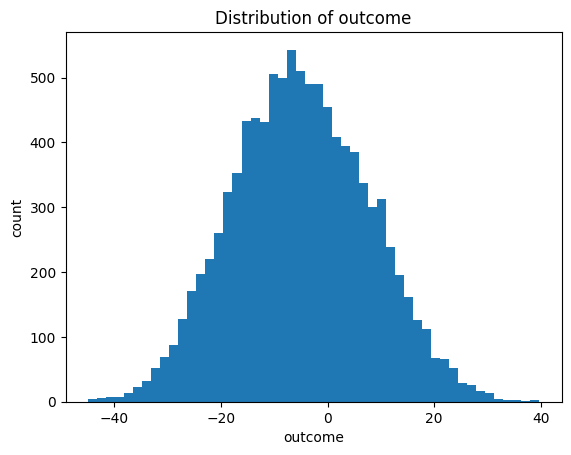

In [11]:
plt.figure()
plt.hist(y, bins=50)
plt.title("Distribution of outcome")
plt.xlabel("outcome")
plt.ylabel("count")
plt.show()

### Target variable analysis

The target variable `outcome` is continuous and takes both positive and negative values, ranging approximately from −45 to 40.  
This indicates that the target is unbounded and that transformations such as a logarithmic transform would be inappropriate.

The distribution of `outcome` appears approximately symmetric and bell-shaped, with a slight concentration of values below zero.  
While some extreme values are present at both ends of the distribution, the majority of observations lie within a moderate range, suggesting limited but non-negligible noise in the data.

In [12]:
df[numerical_cols + ["outcome"]].describe()

,carat,depth,table,price,x,y,z,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.798407,61.748060,57.467360,3910.841900,5.733974,5.741665,3.540757,0.502349,0.507509,0.503561,0.501449,0.500618,0.500001,0.500075,0.500901,0.503297,0.499672,-0.011806,-0.009992,-0.021856,-0.009286,-0.012731,-0.007407,-0.002919,-0.015392,0.000051,-0.008890,-4.979081
std,0.472046,1.429631,2.247036,3940.369616,1.114850,1.228057,0.692502,0.291012,0.291207,0.289080,0.288287,0.289008,0.287718,0.289193,0.290479,0.286463,0.288709,0.999700,1.000633,1.010847,1.010200,1.003570,0.997181,0.992112,0.991442,1.005808,1.005258,12.722224
min,0.200000,50.800000,44.000000,326.000000,0.000000,0.000000,0.000000,0.000128,0.000101,0.000176,0.000101,0.000166,0.000231,0.000048,0.000045,0.000032,0.000102,-3.750688,-3.701252,-3.810713,-3.549324,-3.532430,-3.740254,-3.987845,-4.244733,-3.649063,-3.862407,-44.879471
25%,0.400000,61.000000,56.000000,965.000000,4.730000,4.740000,2.920000,0.249922,0.251350,0.253052,0.254204,0.249160,0.250781,0.247083,0.247653,0.260335,0.249919,-0.672814,-0.697088,-0.696779,-0.674015,-0.681433,-0.687482,-0.666360,-0.678384,-0.667726,-0.680576,-13.989962
50%,0.710000,61.900000,57.000000,2441.000000,5.700000,5.720000,3.530000,0.502063,0.510046,0.505308,0.501914,0.500035,0.502025,0.500868,0.504009,0.502572,0.496931,-0.013058,0.000265,-0.005496,-0.010254,-0.017385,0.001915,0.022894,-0.009743,-0.010082,-0.016215,-5.442794
75%,1.040000,62.500000,59.000000,5226.000000,6.530000,6.530000,4.030000,0.753191,0.764731,0.751173,0.750727,0.753462,0.746049,0.753943,0.753614,0.754412,0.751391,0.640883,0.673117,0.645305,0.669159,0.671203,0.659154,0.654947,0.653020,0.684738,0.656871,3.918593
max,4.000000,70.500000,73.000000,18791.000000,10.010000,58.900000,8.060000,0.999789,0.999976,0.999960,0.999872,0.999947,0.999781,0.999929,0.999859,0.999844,0.999868,3.601364,3.593209,4.243395,3.714985,4.135685,4.012513,3.812652,3.996531,3.808169,3.471238,39.675966


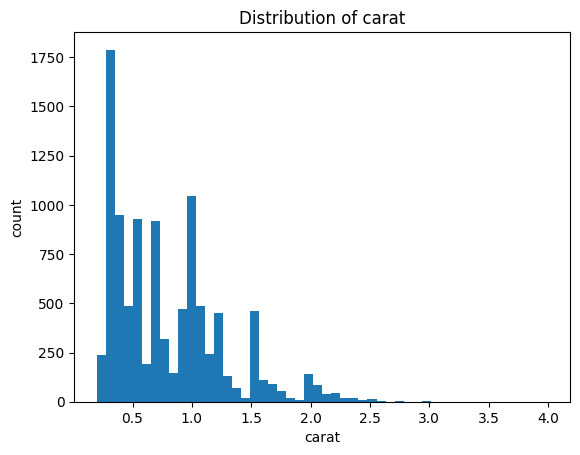

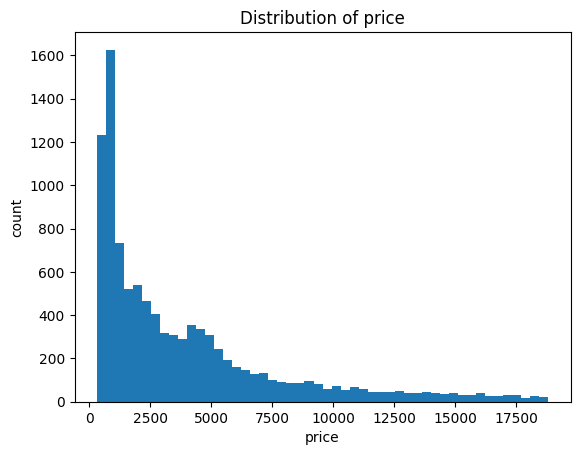

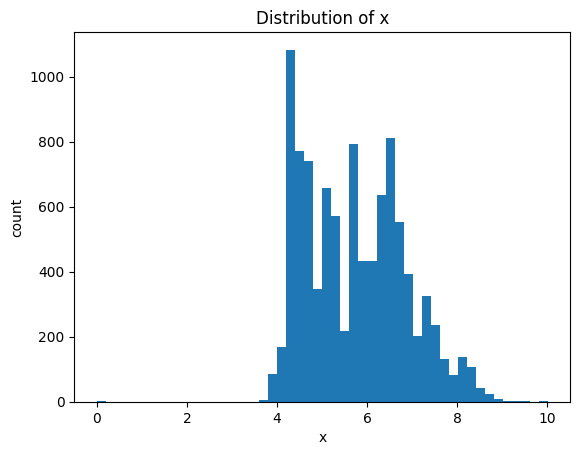

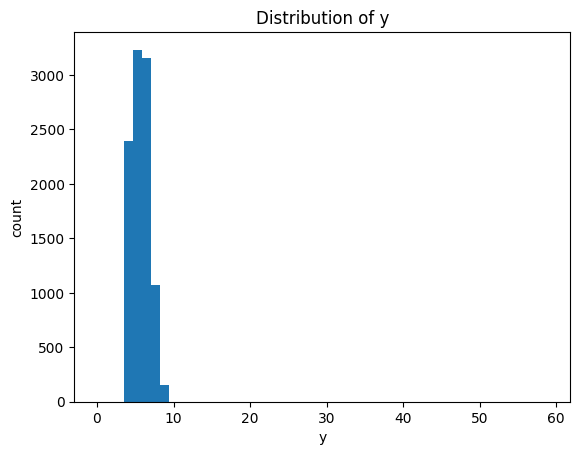

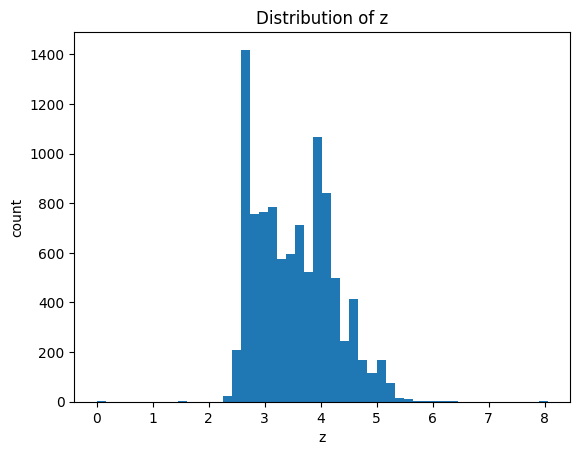

In [13]:
cols_to_plot = ["carat", "price", "x", "y", "z"]
for col in cols_to_plot:
    if col in df.columns:
        plt.figure()
        plt.hist(df[col], bins=50)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

### Numerical feature analysis

The numerical features exhibit substantial variation in both scale and distribution.  
For example, `carat` and `price` are strongly right-skewed, with a small number of large values relative to the bulk of the data. In contrast, geometric features such as `x`, `y`, and `z` are more tightly distributed within narrower ranges.

The large differences in feature scale suggest that standardisation may be beneficial for models that are sensitive to input magnitude, such as linear or distance-based methods.  
Additionally, the presence of skewness and potential outliers in some features indicates that robust or non-linear models may be better suited to capture the underlying relationships.

In [14]:
for col in categorical_cols:
    print("\n", col)
    print(df[col].value_counts())


 cut
cut
Ideal        4040
Premium      2439
Very Good    2296
Good          925
Fair          300
Name: count, dtype: int64

 color
color
G    2120
E    1873
F    1746
H    1506
D    1246
I     983
J     526
Name: count, dtype: int64

 clarity
clarity
SI1     2408
VS2     2256
SI2     1743
VS1     1503
VVS2     951
VVS1     675
IF       318
I1       146
Name: count, dtype: int64


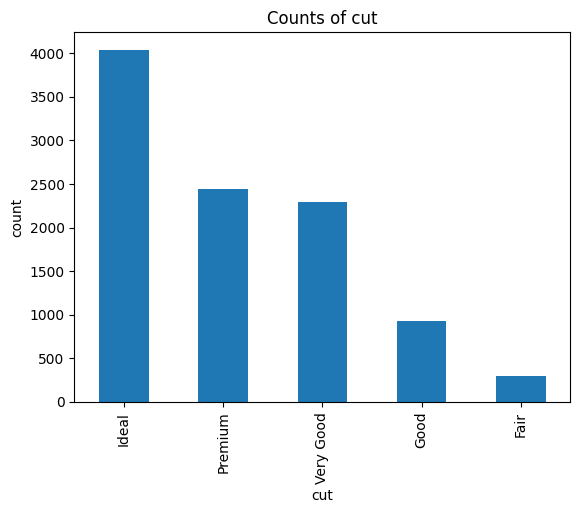

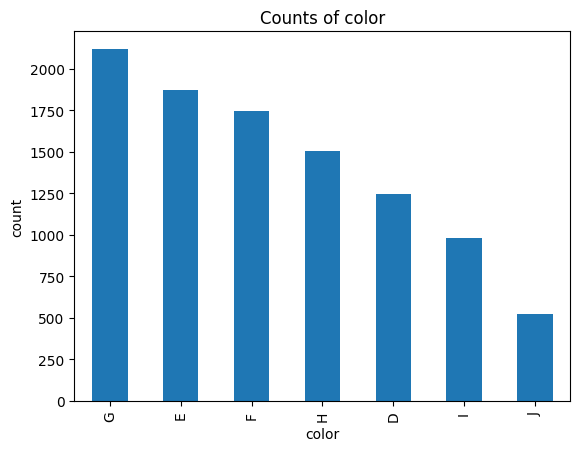

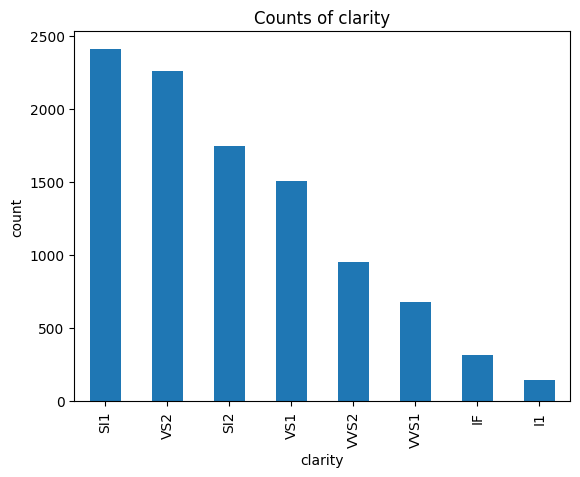

In [15]:
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

### Categorical feature analysis

All categorical features (`cut`, `color`, and `clarity`) exhibit low cardinality, with a limited number of distinct categories.  
This makes them well suited for one-hot encoding without introducing excessive dimensionality.

The distributions of categories are not uniform. For example, certain levels such as `Ideal` in `cut`, `G` in `color`, and `SI1` or `VS2` in `clarity` occur substantially more frequently than others.  
Less frequent categories, such as `Fair` in `cut` or `I1` in `clarity`, may contribute less stable estimates and could increase variance for some models.

The obseved imbalance across categories suggests that these variables contain meaningful structure and are likely to have a measurable influence on the target variable.


In [16]:
corr = df[numerical_cols + ["outcome"]].corr(numeric_only=True)["outcome"].sort_values(ascending=False)
corr

outcome    1.000000
b3         0.225407
b1         0.173719
a1         0.149101
a4         0.122441
table      0.114977
x          0.020354
price      0.016967
y          0.015924
a7         0.012512
b5         0.012370
a2         0.008760
a8         0.007983
a6         0.007238
a9         0.005361
a3         0.003126
carat      0.002538
a10        0.002492
b2         0.001640
a5         0.000690
b6         0.000079
b8        -0.002645
b4        -0.003845
b9        -0.007324
b7        -0.009241
b10       -0.012036
z         -0.031470
depth     -0.411073
Name: outcome, dtype: float64

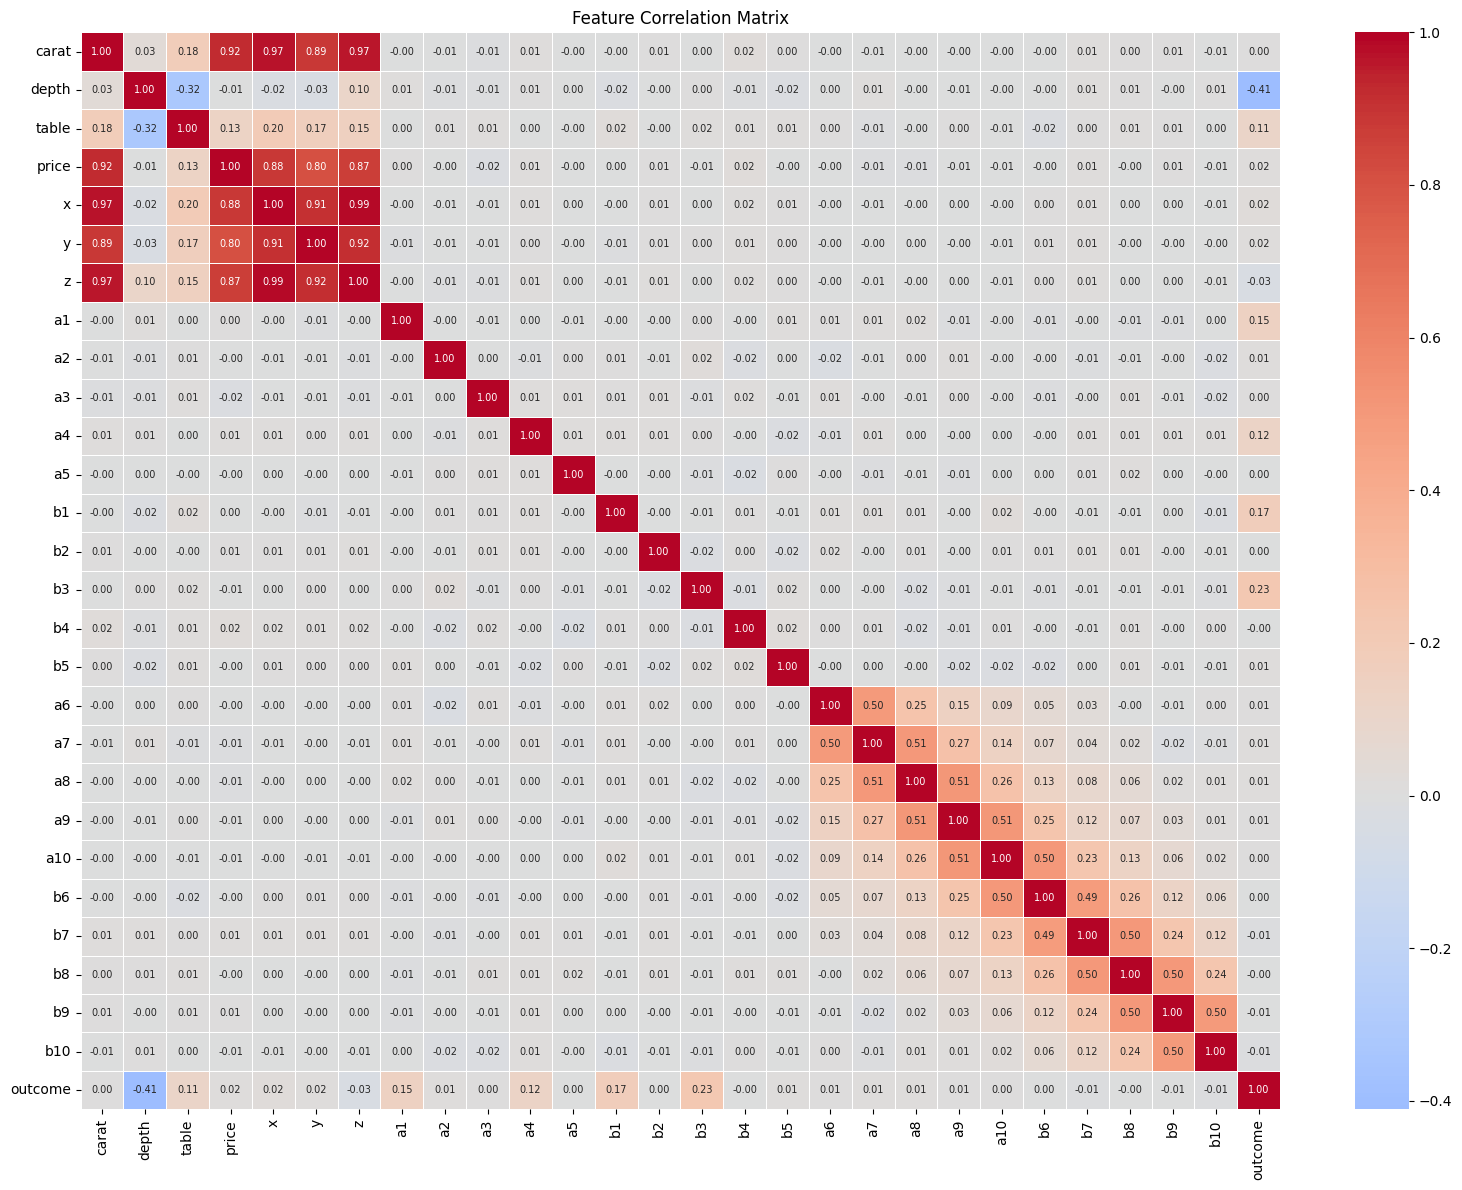

In [17]:
import seaborn as sns

corr_matrix = df[numerical_cols + ["outcome"]].corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot_kws={"size": 7}
)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

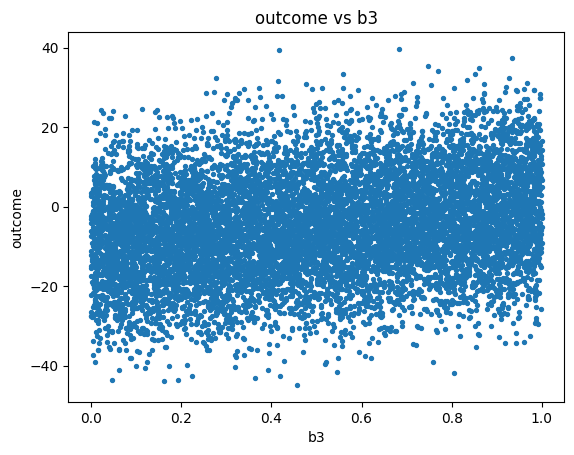

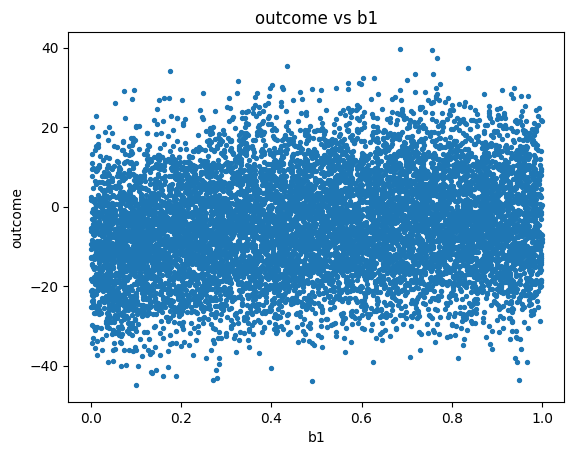

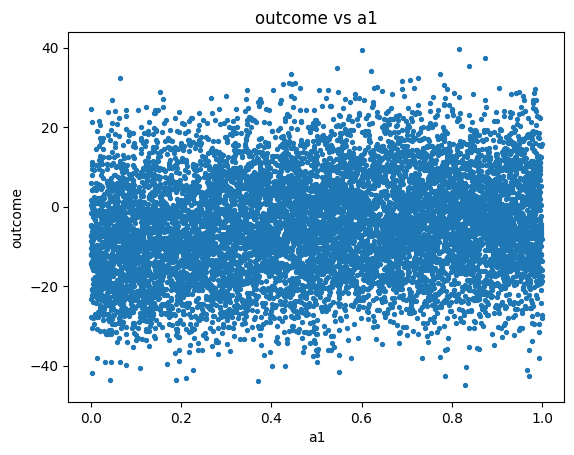

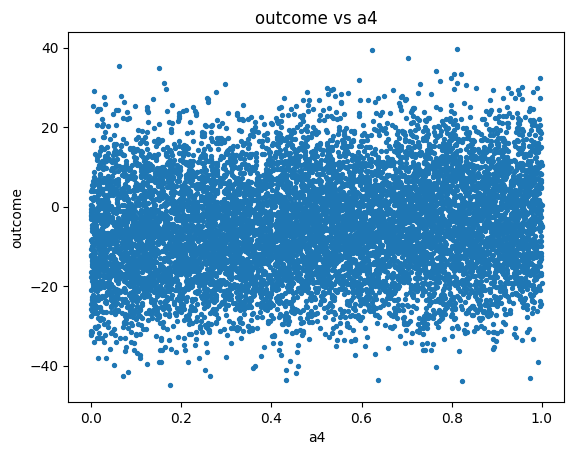

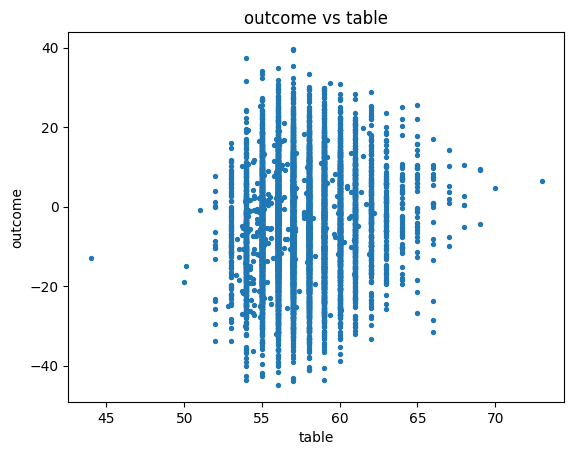

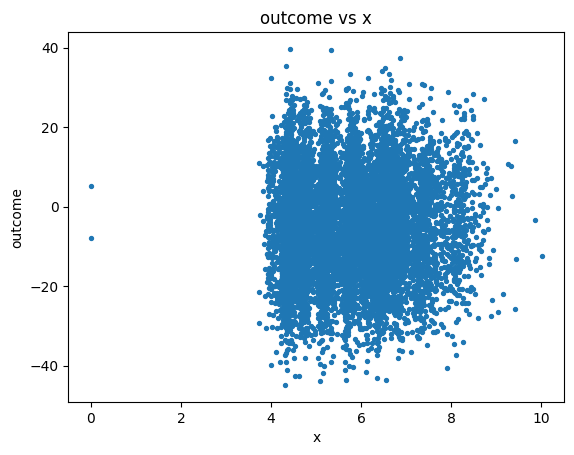

In [18]:
top_features = corr.index.tolist()[1:7]  # first is outcome
for col in top_features:
    plt.figure()
    plt.scatter(df[col], df["outcome"], s=8)
    plt.title(f"outcome vs {col}")
    plt.xlabel(col)
    plt.ylabel("outcome")
    plt.show()

<Figure size 640x480 with 0 Axes>

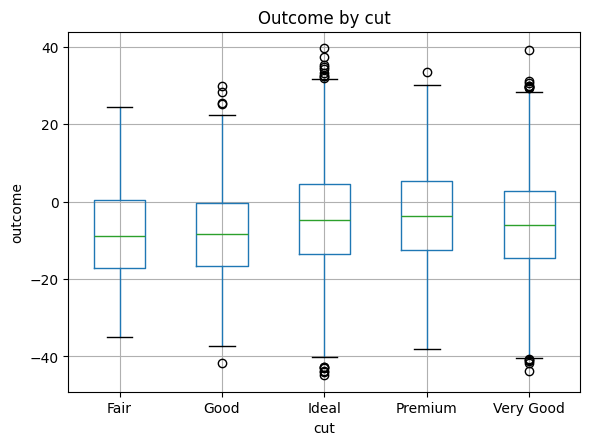

<Figure size 640x480 with 0 Axes>

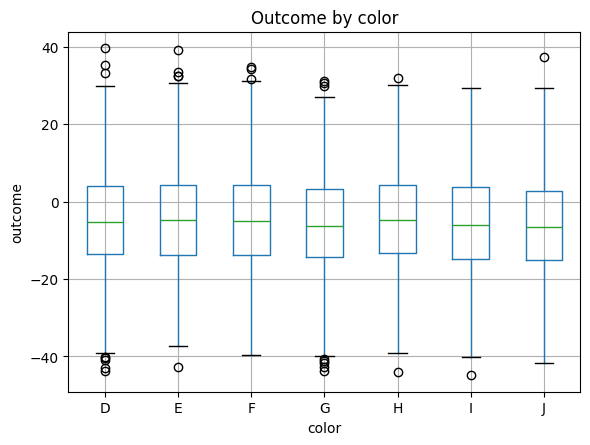

<Figure size 640x480 with 0 Axes>

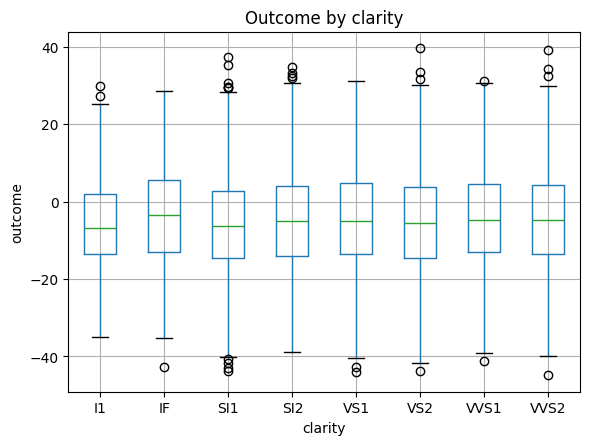

In [19]:
for col in categorical_cols:
    plt.figure()
    df.boxplot(column="outcome", by=col)
    plt.title(f"Outcome by {col}")
    plt.suptitle("")  # remove default suptitle
    plt.xlabel(col)
    plt.ylabel("outcome")
    plt.show()

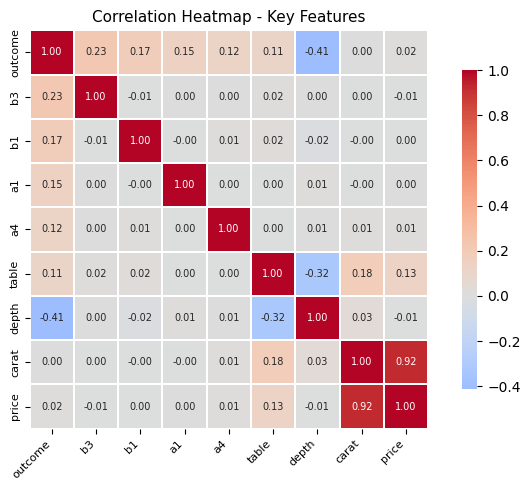

In [20]:
# Create correlation heatmap for top features
top_features_list = ['outcome', 'b3', 'b1', 'a1', 'a4', 'table', 'depth', 'carat', 'price']

plt.figure(figsize=(7, 5))

sns.heatmap(
    df[top_features_list].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.3,
    square=True,
    annot_kws={'size': 7},
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Heatmap - Key Features', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

### Feature–target relationships

Correlation analysis indicates that most numerical features exhibit weak to moderate linear relationships with the target variable.  
Features such as `b3`, `b1`, and `a1` show the strongest positive correlations with `outcome`, while `depth` exhibits a noticeable negative correlation.

Scatter plots reveal that many relationships are noisy and not strictly linear, with substantial variance across the range of feature values.  
This suggests that while linear models may capture some signal, non-linear models may be better suited to represent the underlying structure of the data.

Boxplots across categorical features show systematic shifts in the distribution of `outcome` between categories.  
This indicates that categorical variables contribute meaningful predictive information and should be retained in the modelling process.

### EDA conclusions and implications for modelling

The dataset is clean, with no missing values or duplicate rows detected.  
It consists of a mixture of numerical and categorical features, requiring appropriate preprocessing such as encoding for categorical variables and potential scaling for numerical features.

The target variable `outcome` is continuous and unbounded, with a roughly symmetric distribution and the presence of some outliers.  
Both numerical and categorical features exhibit relationships with the target variable, although many relationships appear noisy and partially non-linear.

These findings motivate the use of regression models capable of capturing both linear and non-linear effects, with preprocessing choices informed by feature scale and type.